# pandas

In [7]:
import pandas as pd

# series

In [8]:
p = pd.Series([0.25 , 0.50 , 0.75 , 1.0 , 1.50])
print(p , "\n")

print("vales -> " , p.values)
print("index -> " , p.index)
print("Keys -> " ,p.keys)
print("Descripe -> " , p.describe())

print("\n\n")

p1 = pd.Series([1,3,5,7] , index = ['a','b','c','d'])
print(p1)

print("\n\n")

p2 = pd.Series({'a':1 , 'b':2 , 'c':3})
print(p2)
print(p2['b'])

0    0.25
1    0.50
2    0.75
3    1.00
4    1.50
dtype: float64 

vales ->  [0.25 0.5  0.75 1.   1.5 ]
index ->  RangeIndex(start=0, stop=5, step=1)
Keys ->  <bound method Series.keys of 0    0.25
1    0.50
2    0.75
3    1.00
4    1.50
dtype: float64>
Descripe ->  count    5.000000
mean     0.800000
std      0.480885
min      0.250000
25%      0.500000
50%      0.750000
75%      1.000000
max      1.500000
dtype: float64



a    1
b    3
c    5
d    7
dtype: int64



a    1
b    2
c    3
dtype: int64
2


# agg

In [9]:
data = p.agg(['max', 'min' , 'mean' , 'sum']) 
print(data)

max     1.50
min     0.25
mean    0.80
sum     4.00
dtype: float64


# Index

In [10]:
a = pd.Index([2,4,6,5,3])
b = pd.Index([1,3,2,4,6])
print(a | b)
print(a & b)
print(a ^ b)

Index([3, 7, 6, 5, 7], dtype='int64')
Index([0, 0, 2, 4, 2], dtype='int64')
Index([3, 7, 4, 1, 5], dtype='int64')


# plot

<Axes: ylabel='Density'>

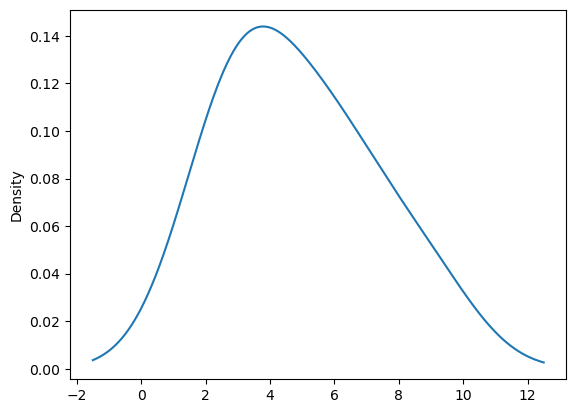

In [11]:
data = pd.Series([3 , 6, 5, 9, 4, 2, 3, 7])
#data.plot(kind = 'line')
#data.plot(kind='pie')
#data.plot(kind='bar')
#data.plot(kind='barh')
#data.plot(kind='box')   # q1 , q2 , q3
#data.plot(kind='area')
data.plot(kind='kde')

# DataFrame

In [12]:
import numpy as np
data_array = np.array([
    [1,2,3,4,5],
    [11,22,33,44,55],
    [10,20,30,40,50]
])
rows = ['a' , 'b' , 'c']
cols = ['c1' , 'c2' , 'c3' , 'c4' , 'c5']
dframe = pd.DataFrame(data_array , index = rows , columns = cols)
print(dframe)

   c1  c2  c3  c4  c5
a   1   2   3   4   5
b  11  22  33  44  55
c  10  20  30  40  50


In [13]:
m = pd.Series({'a':10 , 'b' :20 ,'c': 30,'d': 40})
s = pd.Series({ 'a': 23 ,'b': 45,'c': 66, 'd': 34})
p = pd.Series({'a':11, 'b': 22,'c': 33, 'd': 44})
subjects = pd.DataFrame({'math' : m , 'physics' : p , 'science': s})
print(subjects)
print("\n\n transpose => " ,subjects.T)
print("\n\n Keys => " , subjects.keys())
print("\n\n values => " , subjects.values)
print("\n\n Stack => " , subjects.stack())
print("\n\n physics => " , subjects['physics'])
print('math' in subjects.keys())
print(20 in subjects.values)
print(subjects.iloc[:3 , :2])
print(subjects.loc['a':'c' , :'science'])

   math  physics  science
a    10       11       23
b    20       22       45
c    30       33       66
d    40       44       34


 transpose =>            a   b   c   d
math     10  20  30  40
physics  11  22  33  44
science  23  45  66  34


 Keys =>  Index(['math', 'physics', 'science'], dtype='object')


 values =>  [[10 11 23]
 [20 22 45]
 [30 33 66]
 [40 44 34]]


 Stack =>  a  math       10
   physics    11
   science    23
b  math       20
   physics    22
   science    45
c  math       30
   physics    33
   science    66
d  math       40
   physics    44
   science    34
dtype: int64


 physics =>  a    11
b    22
c    33
d    44
Name: physics, dtype: int64
True
True
   math  physics
a    10       11
b    20       22
c    30       33
   math  physics  science
a    10       11       23
b    20       22       45
c    30       33       66


In [14]:
subjects.sort_values(['math'] , ascending = False)

,math,physics,science
d,40,44,34
c,30,33,66
b,20,22,45
a,10,11,23


In [15]:
subjects.corr()

,math,physics,science
math,1.000000,1.000000,0.379943
physics,1.000000,1.000000,0.379943
science,0.379943,0.379943,1.000000


In [16]:
subjects.query('math > 20 and science > 40')

,math,physics,science
c,30,33,66


In [17]:
df1 = pd.DataFrame({'Emp' : ['jake' , 'pop' , 'meroo' , 'yoka'],
                   'age' : [20 , 10 , 40 , 15]})
df2 = pd.DataFrame({'Emp':['pop' , 'yoka' , 'meroo' , 'jake'],
                   'salary' : [1000 , 3000 , 6000 , 3000]})
#df3 = pd.DataFrame({'name':['jake' , 'pop' , 'meroo' , 'yoka'],'GPA' : [1321 , 32320 , 6230 , 34350]})
print(df1)
print(df2.set_index('Emp'))
print(df1.merge(df2))
#print(pd.merge(df1,df3, left_on = "name" , right_on = "Emp" ).drop("name" , axis = 1))


     Emp  age
0   jake   20
1    pop   10
2  meroo   40
3   yoka   15
       salary
Emp          
pop      1000
yoka     3000
meroo    6000
jake     3000
     Emp  age  salary
0   jake   20    3000
1    pop   10    1000
2  meroo   40    6000
3   yoka   15    3000


# Loading Data into Pandas

In [18]:
data = pd.read_csv('pokemon_data.csv')
print(data.head(5))


   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


# Reading the Data in Pandas

In [19]:
# print(data.columns)
# print(data['Name'])
# print(data[['Name' , 'Type 2']])
# print(data.iloc[1:4])
# print(data.iloc[1,5])
# for ind , row in data.iterrows():
#     print(ind , row['Name'])
data.loc[data['Type 2'] == 'Grass']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False
52,47,Parasect,Bug,Grass,60,95,80,60,80,30,1,False
271,251,Celebi,Psychic,Grass,100,100,100,100,100,100,2,False
293,270,Lotad,Water,Grass,40,30,30,40,50,30,3,False
294,271,Lombre,Water,Grass,60,50,50,60,70,50,3,False
295,272,Ludicolo,Water,Grass,80,70,70,90,100,70,3,False
377,345,Lileep,Rock,Grass,66,41,77,61,87,23,3,False
378,346,Cradily,Rock,Grass,86,81,97,81,107,43,3,False
458,413,WormadamPlant Cloak,Bug,Grass,60,59,85,79,105,36,4,False
536,479,RotomMow Rotom,Electric,Grass,50,65,107,105,107,86,4,False


# Sorting And Describing data

In [20]:
# data.describe()
data.sort_values('Name' , ascending = False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
695,634,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False
46,41,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
631,570,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
632,571,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False
392,359,Absol,Dark,NaN,65,130,60,75,60,75,3,False
68,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False


# Making changes to the data

In [21]:
data['Total'] = data.iloc[: , 4:9].sum(axis = 1)
data.head(5)

# data = data.drop(columns = ['Total'])
# data.head(5)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,545
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244


# Modify

In [22]:
data.to_csv('modify.csv' , index = False)

# Filtering data

In [23]:
new_data = data.loc[(data['Type 2'] == 'Poison') & (data['Speed'] > 100)]
new_data.head(50)
new_data.to_csv('modify.csv' , index = False)
data.head(6)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,545
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,325


In [24]:
# data.loc[data['Name'].str.contains('Mega')]
import re
# data.loc[data['Type 1'].str.contains('grass|fire' , flags = re.I , regex = True)]
data.loc[data['Name'].str.contains('pi[a:z]' , flags = re.I , regex = True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total


In [25]:
data.groupby(['Generation']).count()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total
Generation,,,,,,,,,,,,
1,166,166,166,78,166,166,166,166,166,166,166,166
2,106,106,106,55,106,106,106,106,106,106,106,106
3,160,160,160,82,160,160,160,160,160,160,160,160
4,121,121,121,67,121,121,121,121,121,121,121,121
5,165,165,165,82,165,165,165,165,165,165,165,165
6,82,82,82,50,82,82,82,82,82,82,82,82


# Working with alarge amount of data

In [26]:
for subdata in pd.read_csv('pokemon_data.csv' , chunksize = 5):
    print("CHUNK ")
    print(subdata)

CHUNK 
   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  
CHUNK 
   #                       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
5  5                 Charmeleon   Fire     NaN  58      64       58       80   
6  6                  Charizard   Fire  Flying  78      84       78      109   
7  6  CharizardMega Charizard X

CHUNK 
     #       Name   Type 1    Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
65  60    Poliwag    Water       NaN  40      50       40       40       40   
66  61  Poliwhirl    Water       NaN  65      65       65       50       50   
67  62  Poliwrath    Water  Fighting  90      95       95       70       90   
68  63       Abra  Psychic       NaN  25      20       15      105       55   
69  64    Kadabra  Psychic       NaN  40      35       30      120       70   

    Speed  Generation  Legendary  
65     90           1      False  
66     90           1      False  
67     70           1      False  
68     90           1      False  
69    105           1      False  
CHUNK 
     #                   Name    Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
70  65               Alakazam   Psychic     NaN  55      50       45      135   
71  65  AlakazamMega Alakazam   Psychic     NaN  55      50       65      175   
72  66                 Machop  Fighting     NaN  70      8

CHUNK 
       #                   Name  Type 1  Type 2   HP  Attack  Defense  \
140  130               Gyarados   Water  Flying   95     125       79   
141  130  GyaradosMega Gyarados   Water    Dark   95     155      109   
142  131                 Lapras   Water     Ice  130      85       80   
143  132                  Ditto  Normal     NaN   48      48       48   
144  133                  Eevee  Normal     NaN   55      55       50   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
140       60      100     81           1      False  
141       70      130     81           1      False  
142       85       95     60           1      False  
143       48       48     48           1      False  
144       45       65     55           1      False  
CHUNK 
       #      Name    Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
145  134  Vaporeon     Water    NaN  130      65       60      110       95   
146  135   Jolteon  Electric    NaN   65      65       60      11

CHUNK 
       #                     Name  Type 1    Type 2  HP  Attack  Defense  \
230  213                  Shuckle     Bug      Rock  20      10      230   
231  214                Heracross     Bug  Fighting  80     125       75   
232  214  HeracrossMega Heracross     Bug  Fighting  80     185      115   
233  215                  Sneasel    Dark       Ice  55      95       55   
234  216                Teddiursa  Normal       NaN  60      80       50   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
230       10      230      5           2      False  
231       40       95     85           2      False  
232       40      105     75           2      False  
233       35       75    115           2      False  
234       50       50     40           2      False  
CHUNK 
       #       Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
235  217   Ursaring  Normal     NaN   90     130       75       75       75   
236  218     Slugma    Fire     NaN   40      4

CHUNK 
       #      Name  Type 1    Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
310  286   Breloom   Grass  Fighting   60     130       80       60       60   
311  287   Slakoth  Normal       NaN   60      60       60       35       35   
312  288  Vigoroth  Normal       NaN   80      80       80       55       55   
313  289   Slaking  Normal       NaN  150     160      100       95       65   
314  290   Nincada     Bug    Ground   31      45       90       30       30   

     Speed  Generation  Legendary  
310     70           3      False  
311     30           3      False  
312     90           3      False  
313    100           3      False  
314     40           3      False  
CHUNK 
       #      Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
315  291   Ninjask     Bug  Flying   61      90       45       50       50   
316  292  Shedinja     Bug   Ghost    1      90       45       30       30   
317  293   Whismur  Normal     NaN   64      51       2

       #                 Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
430  386  DeoxysDefense Forme  Psychic     NaN  50      70      160       70   
431  386    DeoxysSpeed Forme  Psychic     NaN  50      95       90       95   
432  387              Turtwig    Grass     NaN  55      68       64       45   
433  388               Grotle    Grass     NaN  75      89       85       55   
434  389             Torterra    Grass  Ground  95     109      105       75   

     Sp. Def  Speed  Generation  Legendary  
430      160     90           3       True  
431       90    180           3       True  
432       55     31           4      False  
433       65     36           4      False  
434       85     56           4      False  
CHUNK 
       #       Name Type 1    Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
435  390   Chimchar   Fire       NaN  44      58       44       58       44   
436  391   Monferno   Fire  Fighting  64      78       52       78       52   
437  

CHUNK 
       #       Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
520  469    Yanmega     Bug  Flying   86      76       86      116       56   
521  470    Leafeon   Grass     NaN   65     110      130       60       65   
522  471    Glaceon     Ice     NaN   65      60      110      130       95   
523  472    Gliscor  Ground  Flying   75      95      125       45       75   
524  473  Mamoswine     Ice  Ground  110     130       80       70       60   

     Speed  Generation  Legendary  
520     95           4      False  
521     95           4      False  
522     65           4      False  
523     95           4      False  
524     80           4      False  
CHUNK 
       #                 Name   Type 1    Type 2  HP  Attack  Defense  \
525  474            Porygon-Z   Normal       NaN  85      80       70   
526  475              Gallade  Psychic  Fighting  68     125       65   
527  475  GalladeMega Gallade  Psychic  Fighting  68     165       95   
528

       #                     Name Type 1   Type 2   HP  Attack  Defense  \
615  555  DarmanitanStandard Mode   Fire      NaN  105     140       55   
616  555       DarmanitanZen Mode   Fire  Psychic  105      30      105   
617  556                 Maractus  Grass      NaN   75      86       67   
618  557                  Dwebble    Bug     Rock   50      65       85   
619  558                  Crustle    Bug     Rock   70      95      125   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
615       30       55     95           5      False  
616      140      105     55           5      False  
617      106       67     60           5      False  
618       35       35     55           5      False  
619       65       75     45           5      False  
CHUNK 
       #        Name   Type 1    Type 2  HP  Attack  Defense  Sp. Atk  \
620  559     Scraggy     Dark  Fighting  50      75       70       35   
621  560     Scrafty     Dark  Fighting  65      90      115       45   

CHUNK 
       #                      Name    Type 1    Type 2  HP  Attack  Defense  \
700  639                 Terrakion      Rock  Fighting  91     129       90   
701  640                  Virizion     Grass  Fighting  91      90       72   
702  641   TornadusIncarnate Forme    Flying       NaN  79     115       70   
703  641     TornadusTherian Forme    Flying       NaN  79     100       80   
704  642  ThundurusIncarnate Forme  Electric    Flying  79     115       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
700       72       90    108           5       True  
701       90      129    108           5       True  
702      125       80    111           5       True  
703      110       90    121           5       True  
704      125       80    111           5       True  
CHUNK 
       #                     Name    Type 1    Type 2   HP  Attack  Defense  \
705  642   ThundurusTherian Forme  Electric    Flying   79     105       70   
706  643                 Resh

CHUNK 
       #                   Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  \
780  710  PumpkabooAverage Size  Ghost  Grass  49      66       70       44   
781  710    PumpkabooSmall Size  Ghost  Grass  44      66       70       44   
782  710    PumpkabooLarge Size  Ghost  Grass  54      66       70       44   
783  710    PumpkabooSuper Size  Ghost  Grass  59      66       70       44   
784  711  GourgeistAverage Size  Ghost  Grass  65      90      122       58   

     Sp. Def  Speed  Generation  Legendary  
780       55     51           6      False  
781       55     56           6      False  
782       55     46           6      False  
783       55     41           6      False  
784       75     84           6      False  
CHUNK 
       #                 Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  \
785  711  GourgeistSmall Size  Ghost  Grass  55      85      122       58   
786  711  GourgeistLarge Size  Ghost  Grass  75      95      122       58   
787  711  

# Data Cleaning in Pandas

In [27]:
print(data.drop_duplicates())

       #                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total  
0         65       65     45           1      False    273  
1

In [28]:
data_dummies = pd.get_dummies(data['Total'] , drop_first=True)
pd.concat([data , data_dummies] , axis = 1)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,585,590,600,605,608,629,640,650,665,680
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,...,False,False,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,...,False,False,False,False,False,False,False,False,False,False
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,...,False,True,False,False,False,False,False,False,False,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,...,False,False,False,False,False,False,False,False,False,False
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,...,False,False,True,False,False,False,False,False,False,False


# Classification

In [29]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df)

      Unnamed: 0  account_length  area_code  international_plan  \
0              0             128        415                   0   
1              1             107        415                   0   
2              2             137        415                   0   
3              3              84        408                   1   
4              4              75        415                   1   
...          ...             ...        ...                 ...   
3328        3328             192        415                   0   
3329        3329              68        415                   0   
3330        3330              28        510                   0   
3331        3331             184        510                   1   
3332        3332              74        415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     25              265.1   
1                   1                     26              161

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
X = churn_df[['account_length' , 'customer_service_calls']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X,y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)
# print(y_pred)

stratify: This parameter ensures that the target variable's class distribution is maintained in both the training and testing sets. It's particularly useful for imbalanced datasets to ensure that each class is adequately represented in both sets.

random_state: Setting a seed ensures reproducibility; using the same seed will produce the same split each time the code is run.

In [31]:
# Import the module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train , y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [32]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


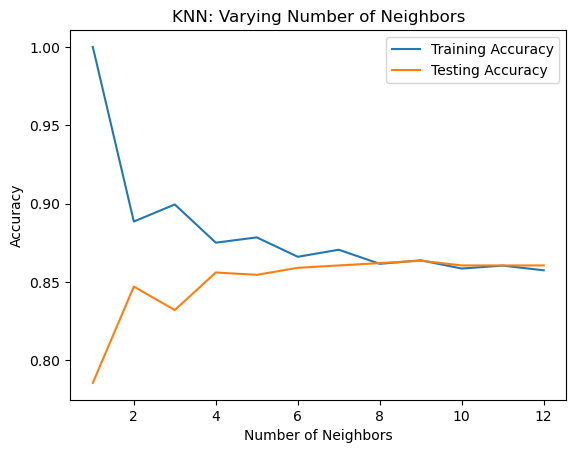

In [33]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
# Display the plot
plt.show()


plt.legend() function is then used to display the legend on the plot. Matplotlib will automatically match the labels with the corresponding lines.

# Regression

In [56]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')
sales_df = sales_df.drop("influencer", axis=1)
print(sales_df)

           tv     radio  social_media      sales
0     16000.0   6566.23       2907.98   54732.76
1     13000.0   9237.76       2409.57   46677.90
2     41000.0  15886.45       2913.41  150177.83
3     83000.0  30020.03       6922.30  298246.34
4     15000.0   8437.41       1406.00   56594.18
...       ...       ...           ...        ...
4541  26000.0   4472.36        717.09   94685.87
4542  71000.0  20610.69       6545.57  249101.92
4543  44000.0  19800.07       5096.19  163631.46
4544  71000.0  17534.64       1940.87  253610.41
4545  42000.0  15966.69       5046.55  148202.41

[4546 rows x 4 columns]


In [57]:
X = sales_df['radio'].values
y = sales_df['sales'].values
# print(X.shape , y.shape)
X = X.reshape(-1,1)
print(X.shape , y.shape)

(4546, 1) (4546,)


In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
predictions = reg.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


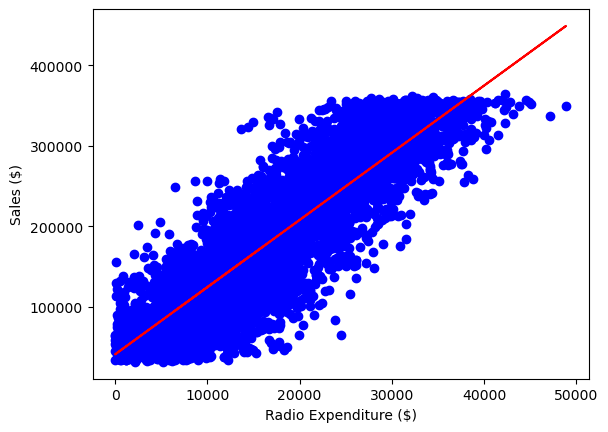

In [59]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [61]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Instantiate the model
reg = LinearRegression()

# # Fit the model to the data

reg.fit(X_train, y_train)

# # # Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [ ]:
R-squared: quantities the variance in target values explained by the features

In [62]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


Cross-validation is a useful technique for obtaining a more robust estimate of a model's performance by training and evaluating the model on multiple subsets of the dataset. The cv_results array contains the performance scores for each fold in the cross-validation process.

In [63]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits = 6, shuffle = True , random_state = 42)
reg = LinearRegression()
cv_score = cross_val_score(reg , X , y , cv = kf)
print(cv_score)
print(np.mean(cv_score))
print(np.std(cv_score))
print(np.quantile(cv_score, [0.025, 0.975]))

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723
3.895599514495595e-05
[0.99893558 0.99905335]


This line calculates the 2.5th and 97.5th percentiles of the cv_results array, which effectively gives you a 95% confidence interval for the cross-validated scores

In [64]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test , y_test)
  ridge_scores.append(score)
print(ridge_scores)
# print(sales_df)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


In [53]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

[8.36162768]


NameError: name 'sales_columns' is not defined

In [67]:
# Import confusion matrix
diabetes_df = pd.read('diabetes_clean.csv')
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train , y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AttributeError: module 'pandas' has no attribute 'read'

In [66]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [68]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

NameError: name 'y_pred_probs' is not defined

In [69]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

NameError: name 'y_pred_probs' is not defined

In [70]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1.0}
Tuned lasso score: 0.9989771896431834


In [71]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

NameError: name 'RandomizedSearchCV' is not defined

In [73]:
music_df = pd.read_csv('music_clean.csv')
print(music_df)

     Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0         36506        60.0      0.896000         0.726     214547.0  0.1770   
1         37591        63.0      0.003840         0.635     190448.0  0.9080   
2         37658        59.0      0.000075         0.352     456320.0  0.9560   
3         36060        54.0      0.945000         0.488     352280.0  0.3260   
4         35710        55.0      0.245000         0.667     273693.0  0.6470   
..          ...         ...           ...           ...          ...     ...   
995       44501        57.0      0.972000         0.193     208040.0  0.0329   
996       25114        56.0      0.005790         0.939     144453.0  0.3730   
997       46896        54.0      0.016100         0.739     238339.0  0.5390   
998       45135        62.0      0.326000         0.515     286707.0  0.5050   
999       18960        42.0      0.029500         0.291     194679.0  0.5980   

     instrumentalness  liveness  loudne

In [74]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, columns=['genre'], drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


In [75]:
# Create X and y
X = music_dummies.drop("popularity" , axis = 1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 9.998909565816525
Standard Deviation of the target array: 14.02156909907019


In [76]:
missing_values = music_df.isnull().sum().sort_values(ascending=True)

# Display the result
print(missing_values)

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [77]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [78]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


In [79]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [('imputer', imputer), ('knn', knn)]


In [80]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

NameError: name 'imp_mean' is not defined

In [81]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.9990152619467033


In [84]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.arange(0.001, 21.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

C:\Users\MR.GN\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MR.GN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MR.GN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

0.05 
 {'logreg__C': 0.001}
